In [2]:
from student_client import create_student_gym_env

step_size = 10
env = create_student_gym_env(step_size=step_size, user_token='your_token')
env.reset()

2026-02-13 11:08:32,776 - student_client.student_gym_env - INFO - Client is up to date (version 0.1)
2026-02-13 11:08:32,782 - student_client.student_gym_env - INFO - Created new session: 4711a1b8-d278-406b-8728-f52e4b100e88
2026-02-13 11:08:33,884 - student_client.student_gym_env - INFO - Created new episode: 0c17d293-ec57-492c-b05b-5b6409b5304d
2026-02-13 11:08:33,885 - student_client.student_gym_env - INFO - StudentGymEnv initialized with episode 0c17d293-ec57-492c-b05b-5b6409b5304d


In [5]:
# Reset environment to get initial observation
obs, info = env.reset()
print(f"📋 Starting episode {info.get('episode_id', 'unknown')}")

obs.shape, info

2026-02-11 18:16:03,837 - student_client.student_gym_env - INFO - Episode d06bd7f9-b853-424a-840c-d4d8bbcd1f84 reset successfully


📋 Starting episode d06bd7f9-b853-424a-840c-d4d8bbcd1f84


((9,),
 {'step': 0,
  'episode_id': 'd06bd7f9-b853-424a-840c-d4d8bbcd1f84',
  'terminated': False,
  'truncated': False})

In [6]:
# Initialize data collection arrays
observations = []
actions = []
rewards = []
total_timesteps = 0

for step in range(50):

    # Choose a random action (0=do nothing, 1=repair, 2=sell)
    action = env.action_space.sample()
    print(action)
    action = 0
    # Take step in environment
    obs_result, reward, terminated, truncated, info = env.step(
        action=action, step_size=10
    )

    observations.append(obs_result)
    actions.append(action)

    rewards.append(reward)

    # Update total timesteps - server advances by step_size but returns only final observation
    total_timesteps += step_size

    # Print progress every step
    if step % 1 == 0:
        print(f" Step {total_timesteps}: Reward={reward:.2f}, Total={sum(rewards):.2f}")

    # Check if episode ended
    if terminated or truncated:
        print(f"🏁 Episode ended at step {total_timesteps} with reward={reward:.2f}")
        break



# Print summary statistics
total_reward = sum(rewards)
print(f"\n Episode Summary:")
print(f"   Total Steps: {len(actions)}")
print(f"   Total Reward: {total_reward:.2f}")
print(f"   Actions Taken: {len([a for a in actions if a == 1])} repairs, {len([a for a in actions if a == 2])} sell")

0
[array([7.9561682e+02, 1.9373752e+04, 3.3461417e+02, 1.1164303e+03,
       3.7130281e-01, 1.3739111e+06, 3.9509507e+03, 0.0000000e+00,
       9.1000004e+00], dtype=float32), array([7.9516083e+02, 1.9346426e+04, 3.3476941e+02, 1.1166514e+03,
       3.7135667e-01, 1.3718302e+06, 3.9519695e+03, 0.0000000e+00,
       9.2210102e+00], dtype=float32), array([7.9453540e+02, 1.9341820e+04, 3.3503442e+02, 1.1177529e+03,
       3.7157294e-01, 1.3659758e+06, 3.9534109e+03, 0.0000000e+00,
       9.3891144e+00], dtype=float32), array([7.9549023e+02, 1.9363605e+04, 3.3518091e+02, 1.1182704e+03,
       3.7168717e-01, 1.3682350e+06, 3.9542444e+03, 0.0000000e+00,
       9.2816744e+00], dtype=float32), array([7.9558344e+02, 1.9351064e+04, 3.3485379e+02, 1.1168671e+03,
       3.7140751e-01, 1.3729900e+06, 3.9524834e+03, 0.0000000e+00,
       9.3737431e+00], dtype=float32), array([7.9457556e+02, 1.9341598e+04, 3.3505469e+02, 1.1178057e+03,
       3.7158480e-01, 1.3660079e+06, 3.9535339e+03, 0.0000000e+00

KeyboardInterrupt: 

In [7]:
obs

array([7.9775842e+02, 1.9392391e+04, 3.3574557e+02, 1.1198943e+03,
       3.7205338e-01, 1.3730048e+06, 3.9576077e+03, 0.0000000e+00,
       9.8833590e+00], dtype=float32)

In [ ]:
# Finish episode
env.close()

In [41]:
len(observations), len(actions)

(2, 2)

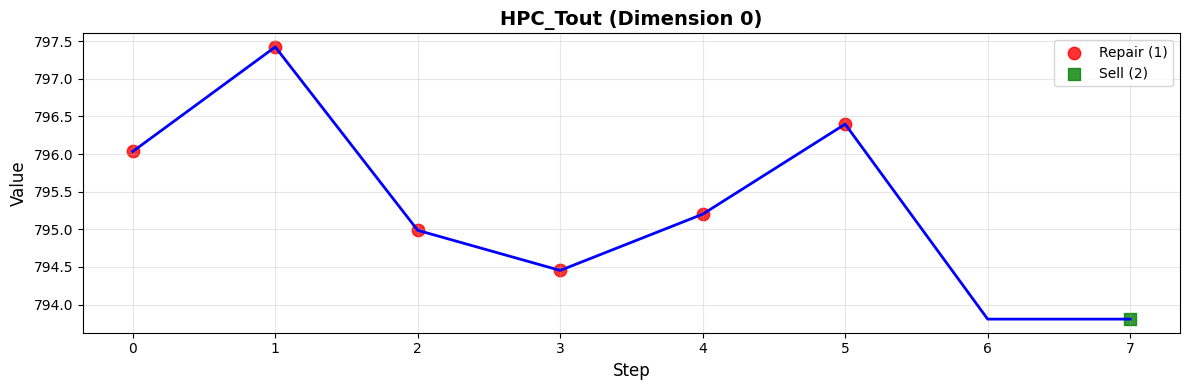

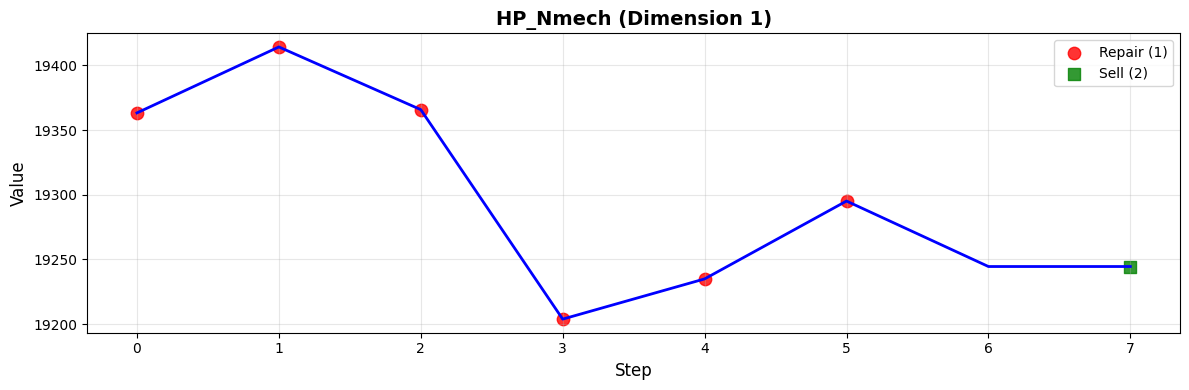

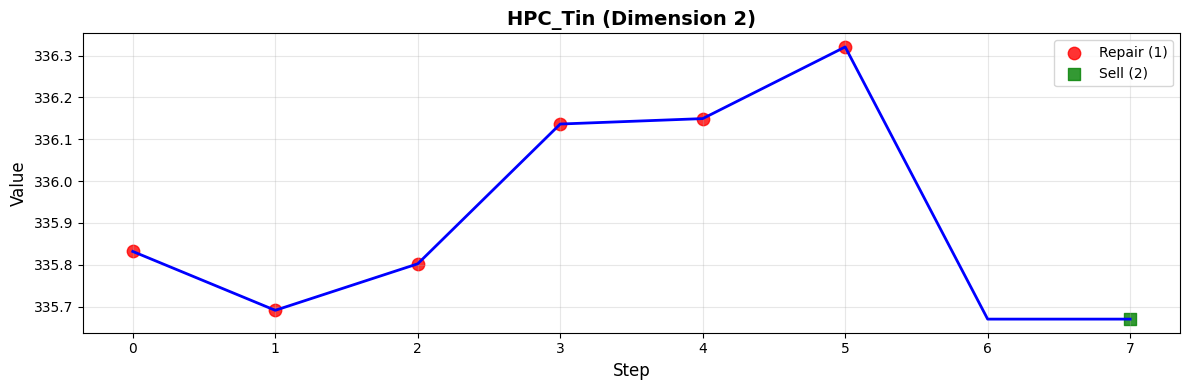

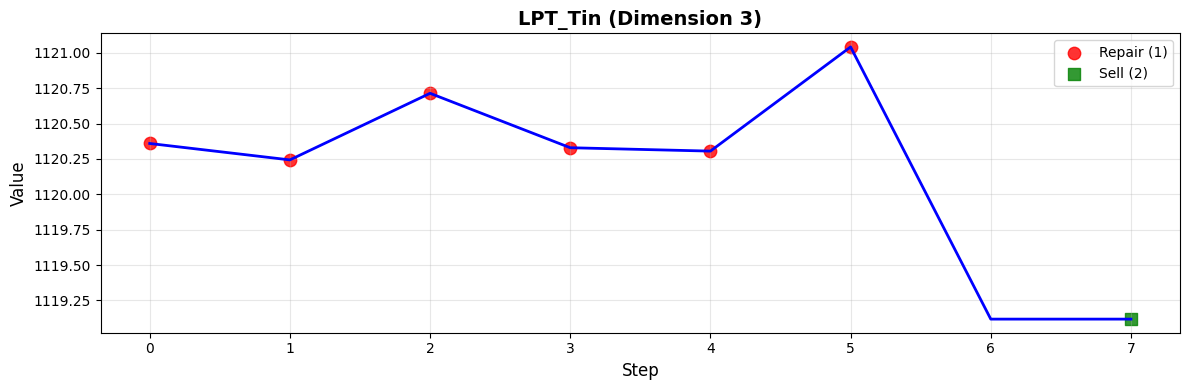

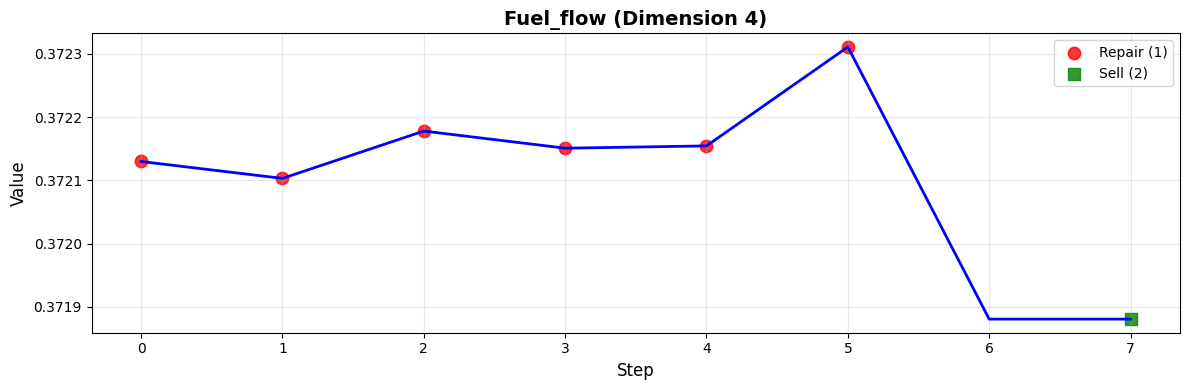

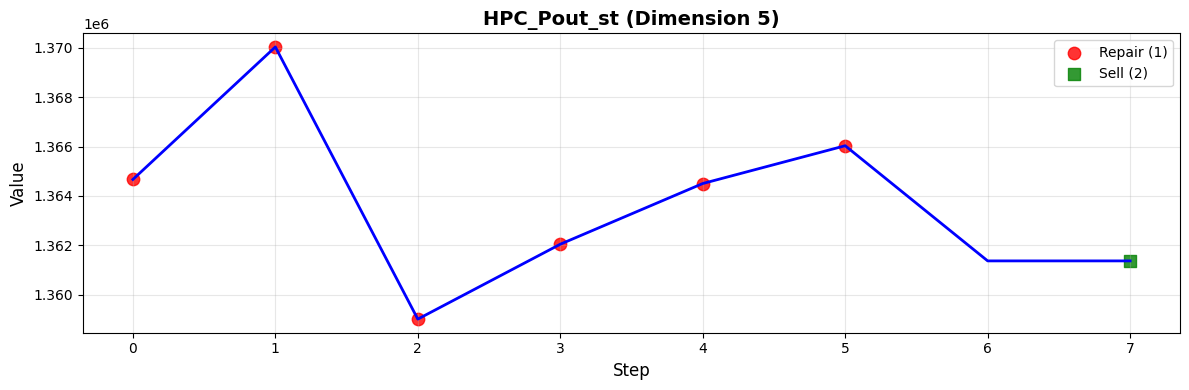

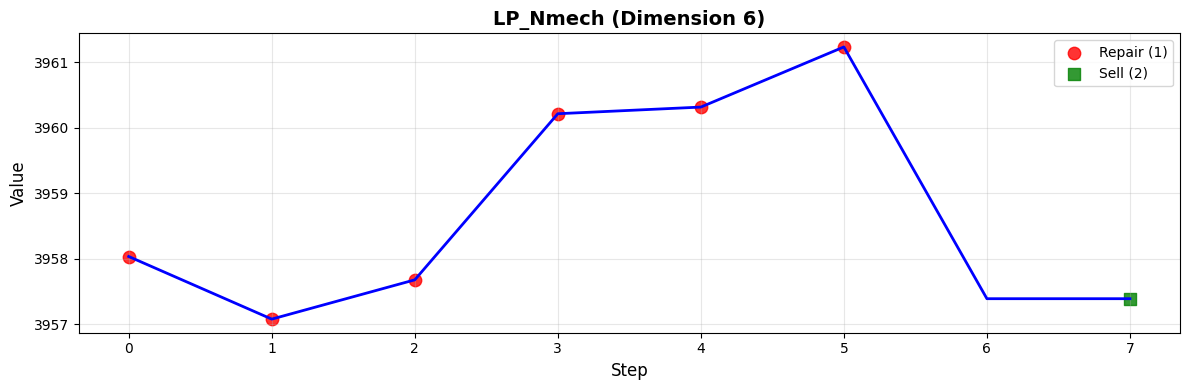

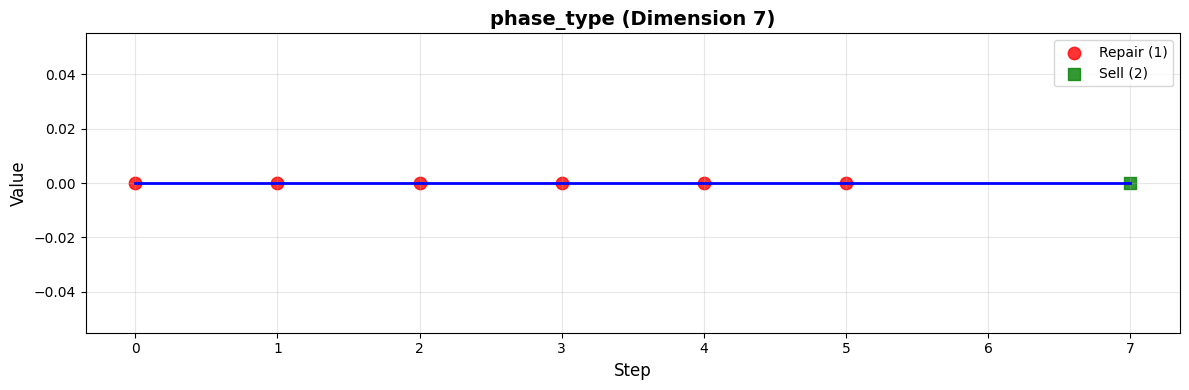

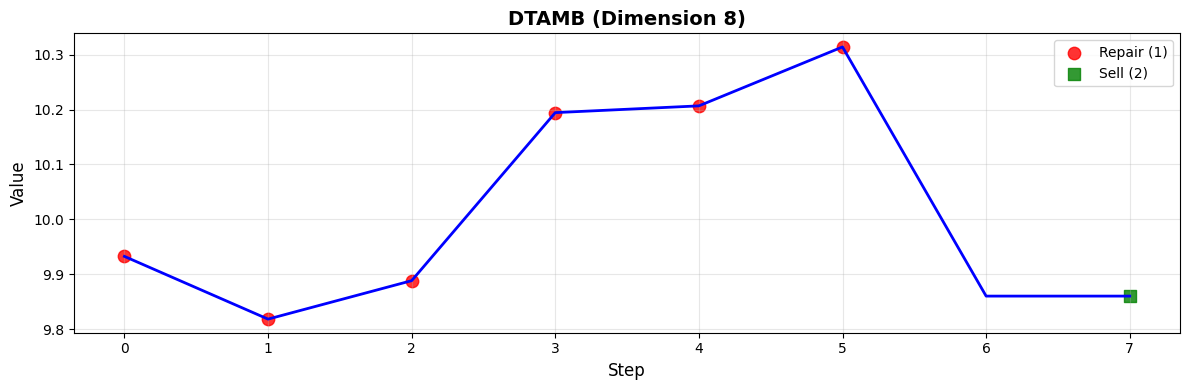

In [38]:
from student_client.plotting import plot_observations

plot_observations(
        observations=observations,
        actions=actions,
        title="Simple Policy - Observation Dimensions Over Time"
    )

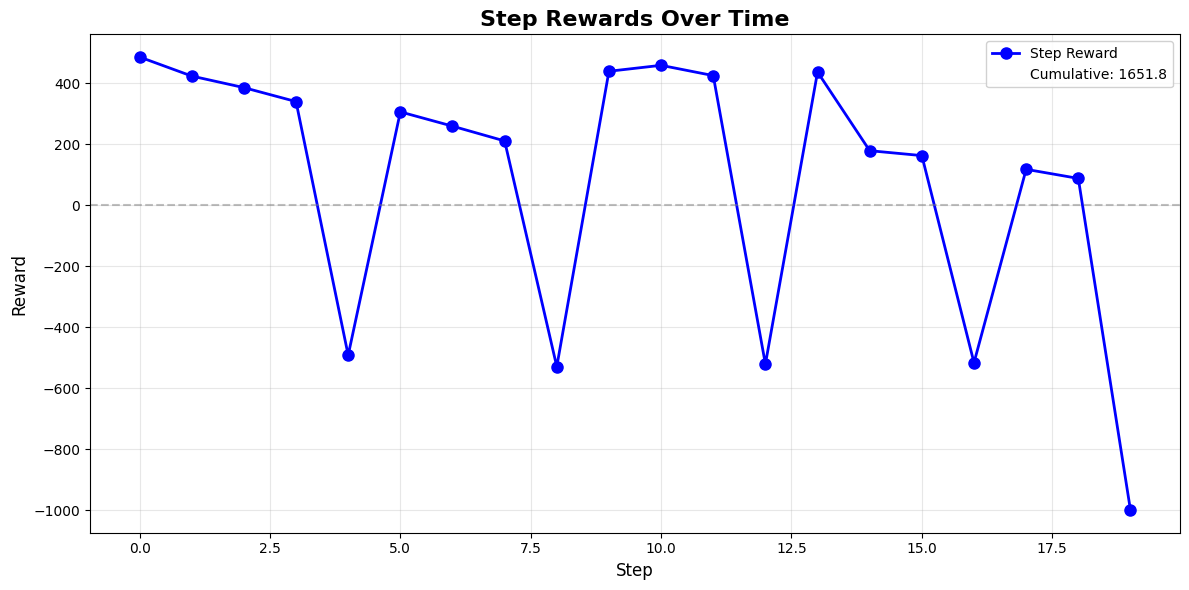

📊 Reward Statistics:
   Total Steps: 20
   Total Reward: 1651.80
   Average Reward: 82.59
   Max Reward: 485.65
   Min Reward: -1000.00


In [6]:
from student_client.plotting import plot_rewards

plot_rewards(rewards=rewards)